<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/sidhus/crab-age-prediction/data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
import random
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Dataset/CrabAgePrediction.csv')
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [4]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [5]:
df[df['Height']==0]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
269,I,0.7875,0.575,0.0,3.798833,1.630096,0.807961,9.936500,6
3867,I,1.0750,0.850,0.0,12.133586,5.854172,2.438057,3.260193,8


In [6]:
df.duplicated().sum()

0

In [7]:
df['Age'].value_counts()

Age
9     640
10    598
8     520
11    459
7     357
12    248
6     241
13    195
14    122
5     107
15     96
16     62
17     54
4      53
18     38
19     31
20     23
21     14
3      13
23      7
22      6
27      2
24      2
2       1
1       1
29      1
25      1
26      1
Name: count, dtype: int64

<h2>EDA</h2>

<Axes: xlabel='Age', ylabel='count'>

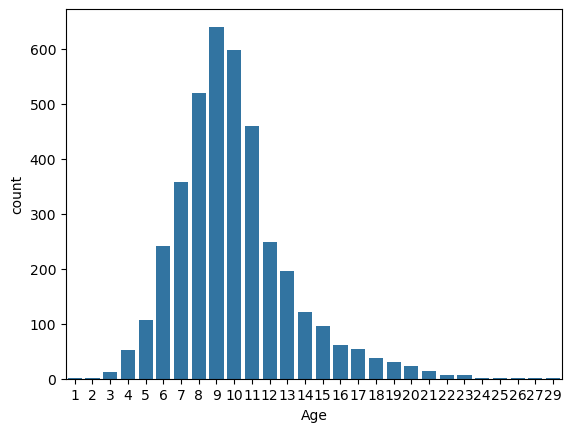

In [8]:
sns.countplot(df, x='Age')

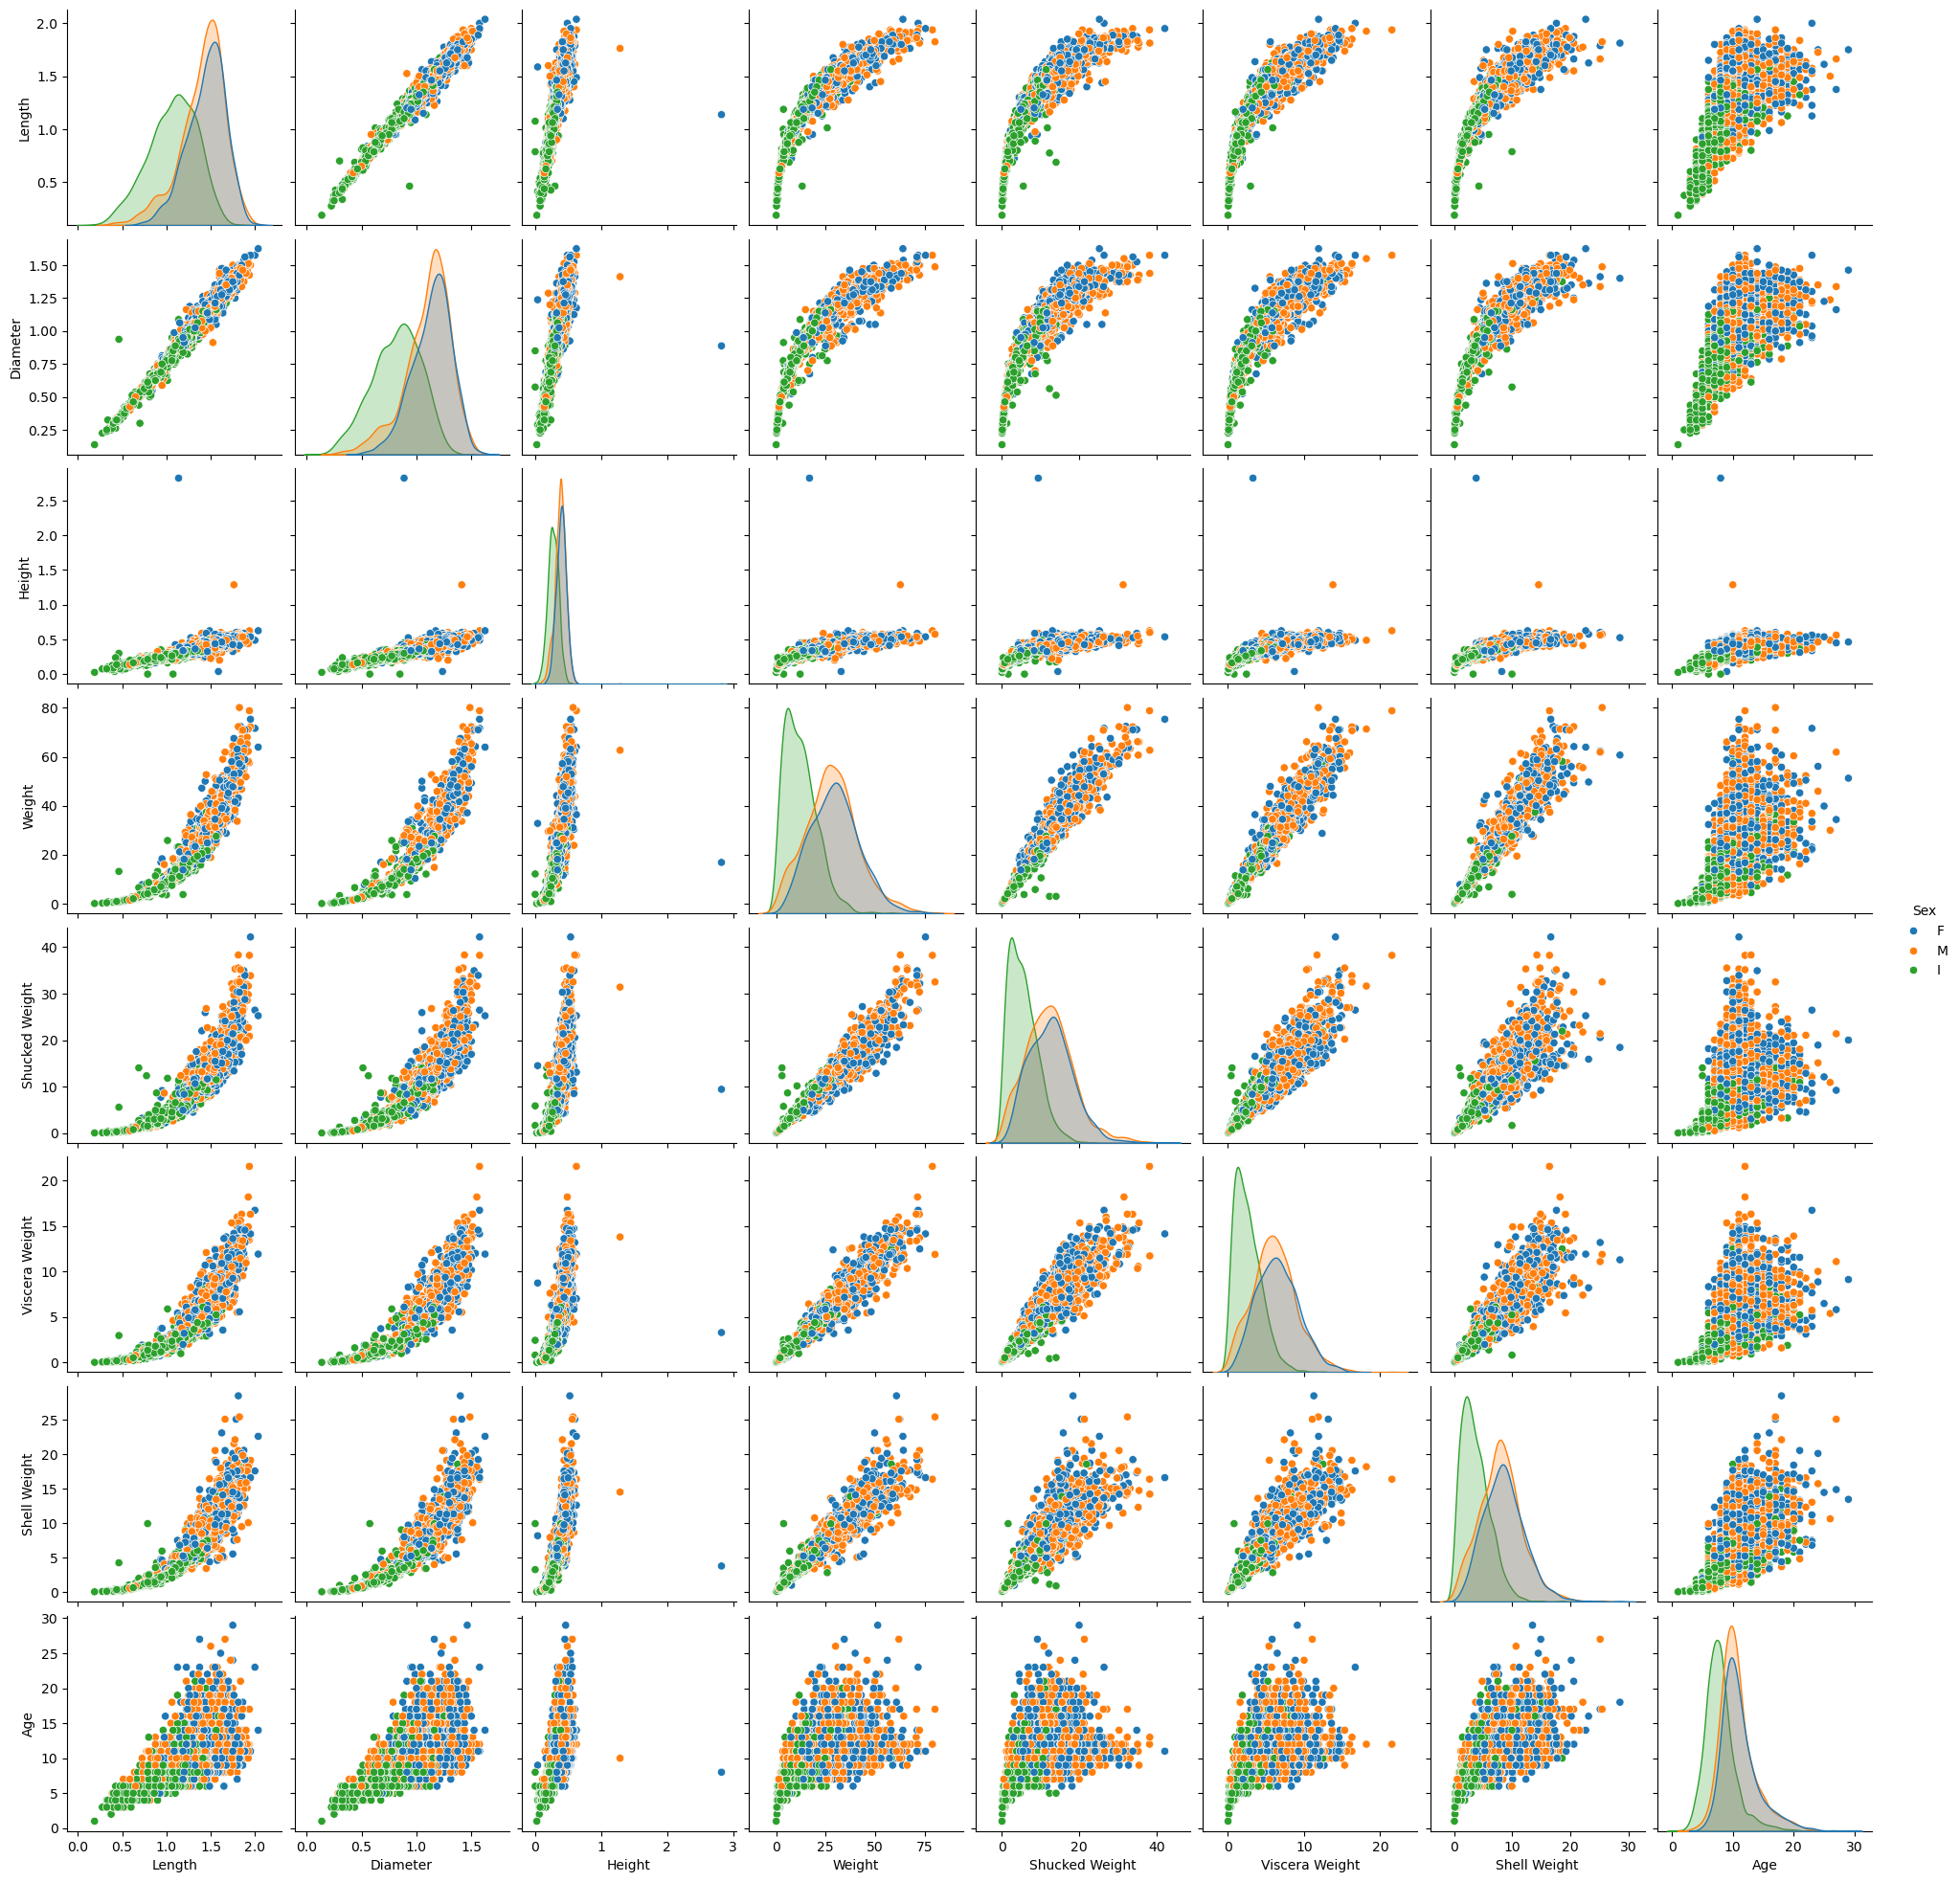

In [9]:
sns.pairplot(df, hue='Sex')

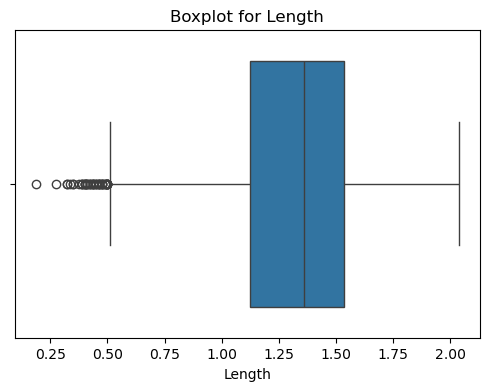

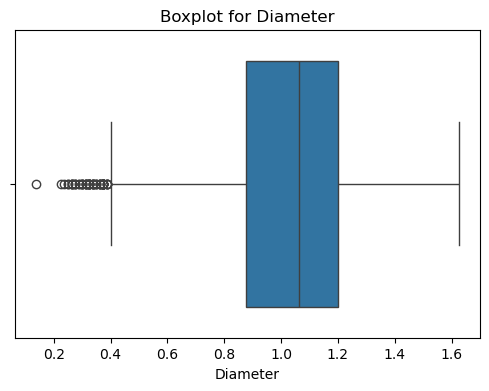

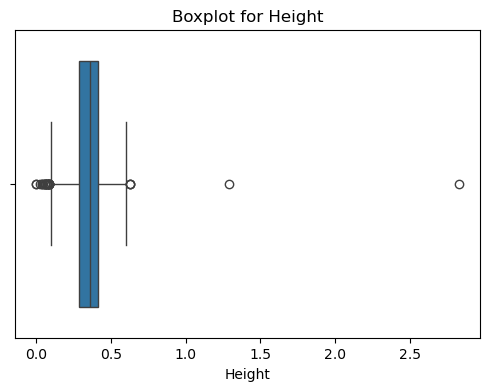

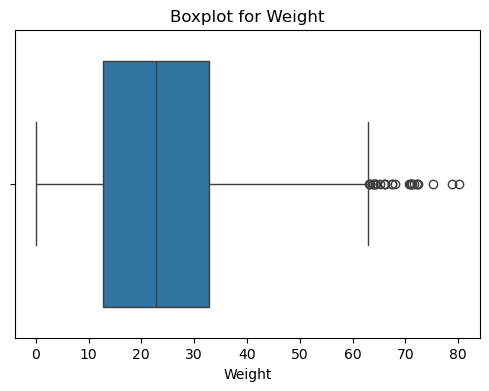

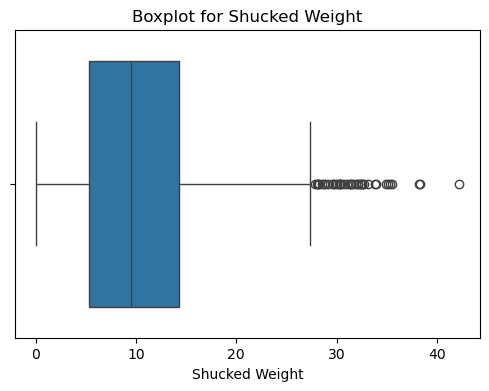

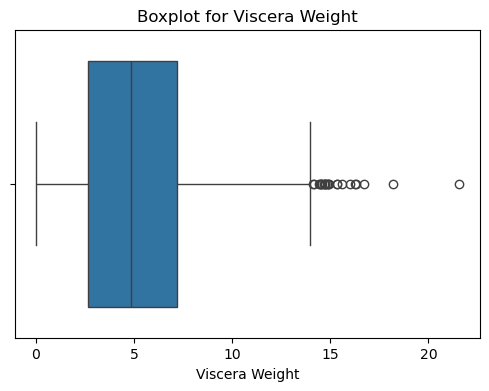

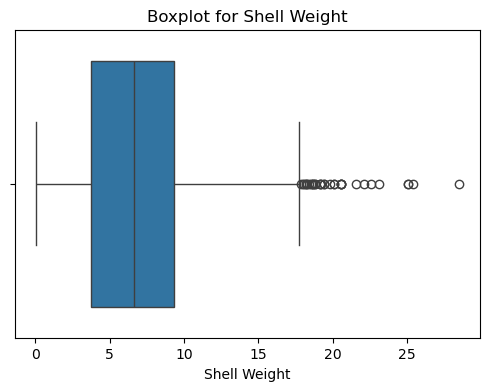

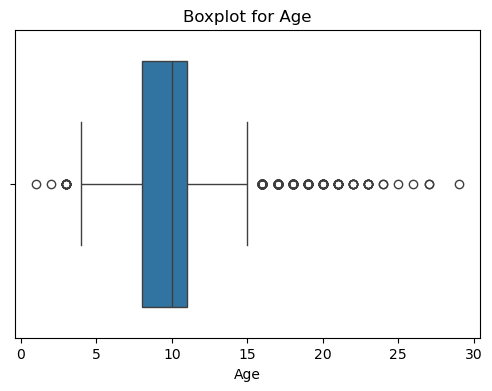

In [10]:
for col in df.columns:
    if col !="Sex":
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot for {col}")
        plt.show();

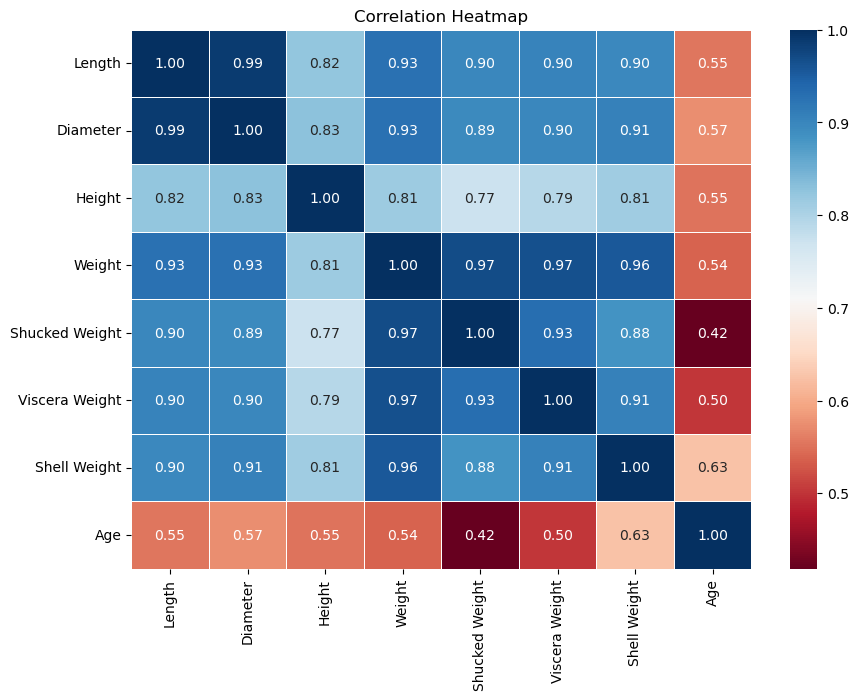

In [11]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

<h2>Feature Engineering</h2>

In [12]:
df['Shucked Weight Ratio'] = df['Shucked Weight'] / df['Weight']
df['Viscera Weight Ratio'] = df['Viscera Weight'] / df['Weight']
df['Shell Weight Ratio'] = df['Shell Weight'] / df['Weight']
df['Size Ratio'] = df['Length'] / df['Diameter']
df['Growth Rate'] = df["Length"] / df['Age']

<h2>Data Splitting</h2>

In [13]:
x = df.drop(['Age', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Length'], axis=1)
y = df['Age']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
le = LabelEncoder()
x_train['Sex'] = le.fit_transform(x_train['Sex'])
x_test['Sex'] = le.transform(x_test['Sex'])

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<h2>Machine Learning</h2>

In [16]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(x_train, y_train)
r2_train = rf.score(x_train, y_train)

# Make predictions
y_pred = rf.predict(x_test)
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display results
print(f"R-squared(Train): {r2_train:.4f}")
print(f"R-squared(Test): {r2_test:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared(Train): 0.9981
R-squared(Test): 0.9894
MAE: 0.1807
RMSE: 0.3184


<h2>Deep Learning</h2>

In [17]:
tf.random.set_seed(42)

DL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Compile the model
DL_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = DL_model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=5)])

Epoch 1/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 71.8021 - mae: 7.7318 - val_loss: 11.4587 - val_mae: 2.6336
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 8.9946 - mae: 2.2222 - val_loss: 5.5264 - val_mae: 1.5924
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 4.9600 - mae: 1.5353 - val_loss: 4.1035 - val_mae: 1.3507
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.7373 - mae: 1.2989 - val_loss: 3.0230 - val_mae: 1.0866
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7962 - mae: 1.0568 - val_loss: 2.2701 - val_mae: 0.8983
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2.1370 - mae: 0.8803 - val_loss: 1.7938 - val_mae: 0.7910
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.7004 - mae: 0.7699 - val_loss: 1.4653 - val_mae: 0.7115
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.3841 - mae: 0.6804 - val_loss: 1.2152 - val_mae: 0.6397
Epoch 9/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - 

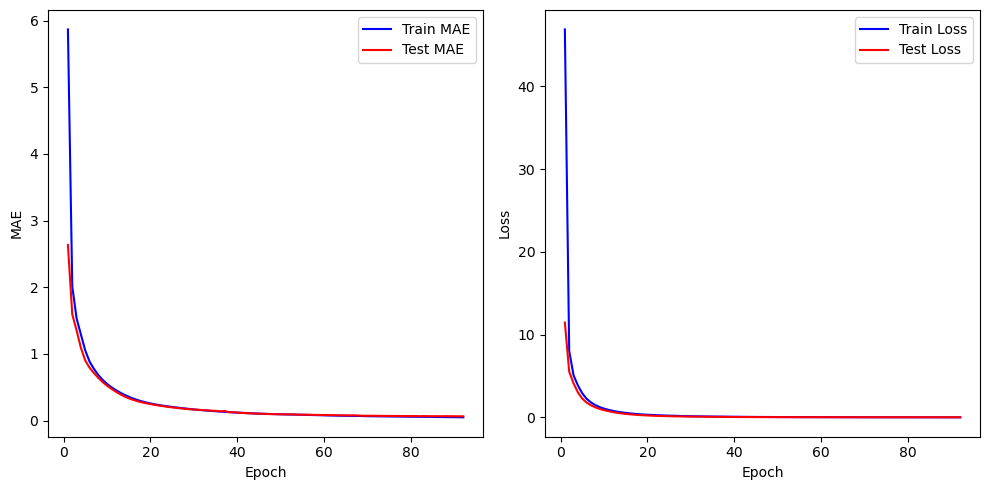

In [18]:
# learning curve
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Test MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()

plt.show();

In [19]:
y_pred = DL_model.predict(x_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Root Mean Squared Error (RMSE): 0.1107
Mean Absolute Error (MAE): 0.0631
R-squared (R2): 0.9987


<h2>Machine Learning vs Deep Learning</h2>

In [20]:
x.columns

Index(['Sex', 'Diameter', 'Height', 'Weight', 'Shucked Weight Ratio',
       'Viscera Weight Ratio', 'Shell Weight Ratio', 'Size Ratio',
       'Growth Rate'],
      dtype='object')

In [22]:
# Make predictions
new_data = [[1, 0.9, 0.29, 12.5, 0.44, 0.21, 0.30, 1.32, 0.15]]
transformed_new_data = sc.transform(new_data)
ML_prediction = rf.predict(transformed_new_data)
DL_prediction = DL_model.predict(transformed_new_data)

print("ML predicted crab's age: ", ML_prediction)
print("DL predicted crab's age: ", DL_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
ML predicted crab's age:  [7.94]
DL predicted crab's age:  [[7.8987103]]
